In [5]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns



In [6]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")


In [36]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



#df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])


Number of clusters: 3
Silhouette Coefficient: 0.245


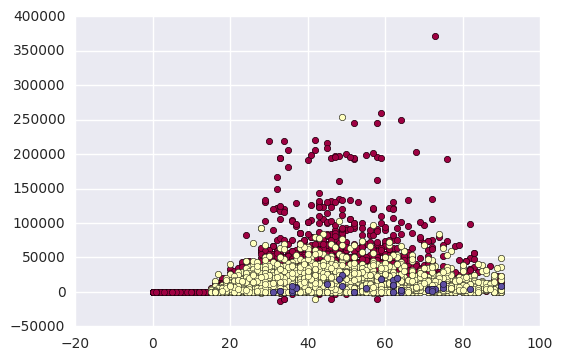

In [13]:

X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 3

labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')



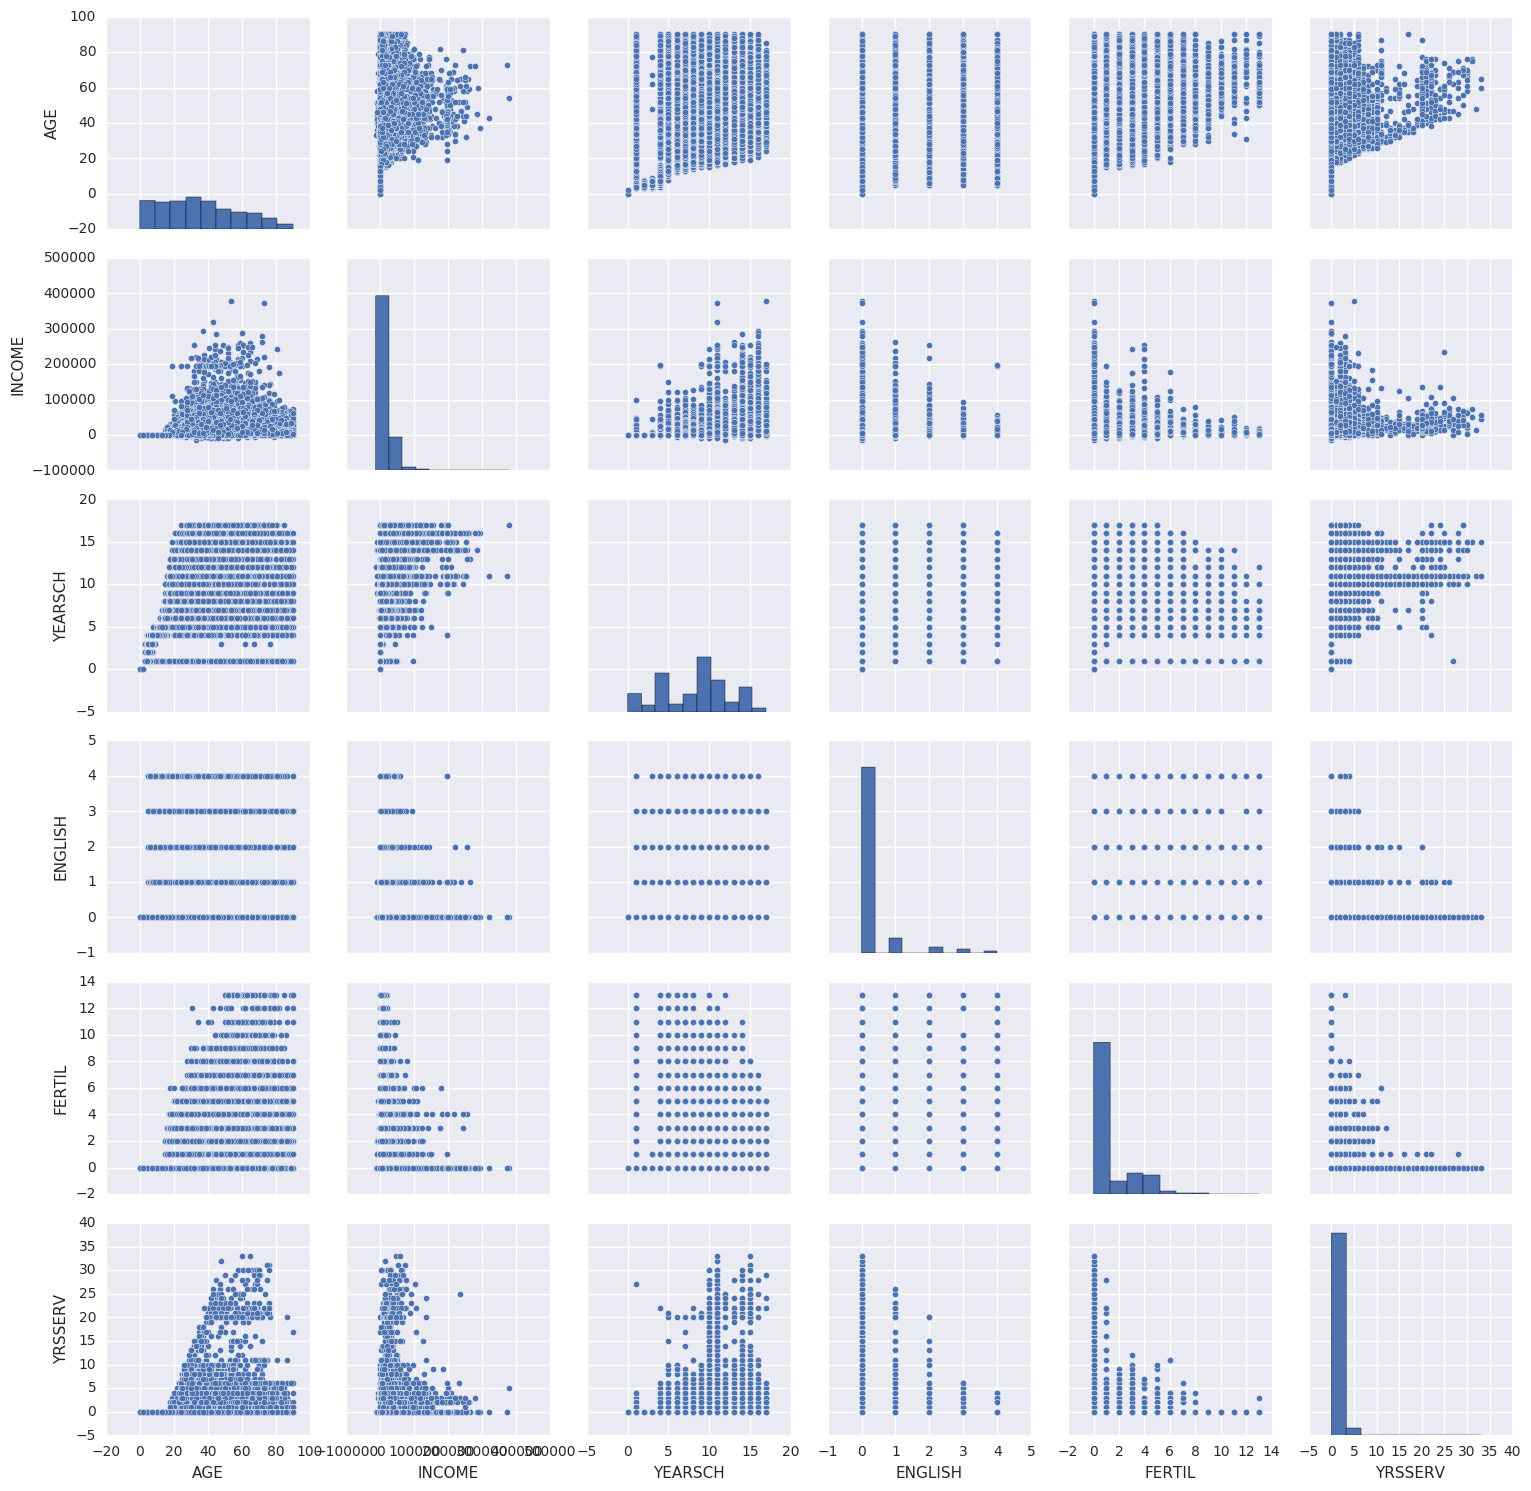

In [37]:
g = sns.pairplot(df_demo)    


In [67]:
clusters = np.arange(2,11)
silhoutte_max_scores = []
silhouette_scores = np.empty([])
#data = {}
data = []
for cluster in clusters:
    sil = []
    for i in range(10):
        clusterer = KMeans(n_clusters=cluster)
        cluster_labels = clusterer.fit_predict(X_db)
        sc = silhouette_score(X_db, cluster_labels)
        sil.append(sc)
        data.append([cluster,sc])
    ith_cluster_silhouette_values = max(sil)
    silhoutte_max_scores.append([cluster,ith_cluster_silhouette_values])
    #data[cluster] = ith_cluster_silhouette_values

In [68]:
for cluster,silhoutte in silhoutte_max_scores:
    print 'cluster number: ', cluster, ' --  max silhoutte: ', silhoutte

cluster number:  2  --  max silhoutte:  0.393372355392
cluster number:  3  --  max silhoutte:  0.269779661792
cluster number:  4  --  max silhoutte:  0.302169507583
cluster number:  5  --  max silhoutte:  0.317457282824
cluster number:  6  --  max silhoutte:  0.358894619135
cluster number:  7  --  max silhoutte:  0.387991772783
cluster number:  8  --  max silhoutte:  0.400859304097
cluster number:  9  --  max silhoutte:  0.438541958379
cluster number:  10  --  max silhoutte:  0.441509187419


(90, 2)


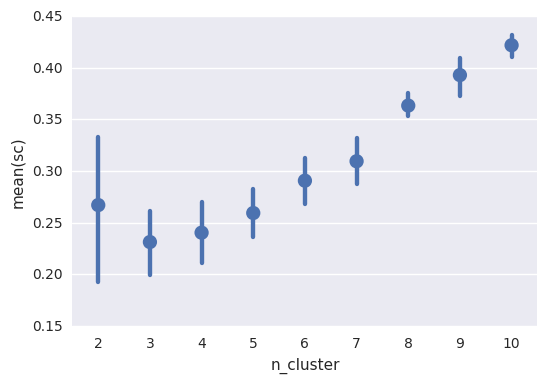

In [71]:
dataFrame = pd.DataFrame(data)
print dataFrame.shape
dataFrame.columns = ["n_cluster","sc"]
sns.pointplot(x="n_cluster",y="sc",data = dataFrame,join = False)
